In [1]:
# Import packages
library(ggplot2)
library(ggridges)
library(dplyr)
# Set the plot width and height
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 100)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
“package ‘ggridges’ was built under R version 3.6.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
# read in the data
traits = read.csv(file = "ath-tcv-single-value-traits.csv", na.strings = "none")
hues = read.csv(file = "ath-tcv-multi-value-traits.csv", na.strings = "none")

In [3]:
head(traits)

camera,imgtype,zoom,exposure,gain,frame,lifter,timestamp,id,plantbarcode,...,longest_path,convex_hull_vertices,object_in_frame,ellipse_major_axis,ellipse_minor_axis,ellipse_angle,ellipse_eccentricity,hue_circular_mean,hue_circular_std,hue_median
NA,NA,NA,NA,NA,NA,NA,17dpi,#3,Col-0,...,13177,32,True,1566.076,1326.944,121.150490,0.53110654,77.31809,80,80
NA,NA,NA,NA,NA,NA,NA,05dpi,#7,Col-0,...,11431,35,True,1393.484,1173.632,124.233017,0.53912133,99.66514,100,100
NA,NA,NA,NA,NA,NA,NA,11dpi,#1,Col-0,...,13574,53,True,1688.714,1600.874,9.778239,0.31831785,90.85077,92,92
NA,NA,NA,NA,NA,NA,NA,01dpi,#8,Col-0,...,9448,44,True,1166.822,1162.983,87.282463,0.08104941,103.74071,104,104
NA,NA,NA,NA,NA,NA,NA,03dpi,#4,Col-0,...,9944,49,True,1162.635,1108.709,15.259134,0.30102168,103.54782,102,102
NA,NA,NA,NA,NA,NA,NA,13dpi,#9,Col-0,...,14880,33,True,1733.560,1619.710,128.721848,0.35641931,110.52741,110,110


In [4]:
head(hues)

camera,imgtype,zoom,exposure,gain,frame,lifter,timestamp,id,plantbarcode,treatment,cartag,measurementlabel,other,image,trait,value,label
NA,NA,NA,NA,NA,NA,NA,17dpi,#3,Col-0,wt,NA,NA,NA,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,hue_frequencies,782,1
NA,NA,NA,NA,NA,NA,NA,17dpi,#3,Col-0,wt,NA,NA,NA,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,hue_frequencies,57,3
NA,NA,NA,NA,NA,NA,NA,17dpi,#3,Col-0,wt,NA,NA,NA,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,hue_frequencies,34,5
NA,NA,NA,NA,NA,NA,NA,17dpi,#3,Col-0,wt,NA,NA,NA,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,hue_frequencies,66,7
NA,NA,NA,NA,NA,NA,NA,17dpi,#3,Col-0,wt,NA,NA,NA,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,hue_frequencies,54,9
NA,NA,NA,NA,NA,NA,NA,17dpi,#3,Col-0,wt,NA,NA,NA,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,hue_frequencies,274,11


In [5]:
# remove columns with missing data
traits = traits %>%
    select_if(~ !any(is.na(.)))
hues = hues %>%
    select_if(~ !any(is.na(.)))
# keep hue frequency data only
hues = hues %>%
    filter(trait == "hue_frequencies")

In [6]:
head(traits)

timestamp,id,plantbarcode,treatment,image,in_bounds,area,convex_hull_area,solidity,perimeter,...,longest_path,convex_hull_vertices,object_in_frame,ellipse_major_axis,ellipse_minor_axis,ellipse_angle,ellipse_eccentricity,hue_circular_mean,hue_circular_std,hue_median
17dpi,#3,Col-0,wt,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,True,1414421,2153931,0.6566696,13669.64,...,13177,32,True,1566.076,1326.944,121.150490,0.53110654,77.31809,80,80
05dpi,#7,Col-0,M,./ath_tcv_images/mock/Col-0_M_#7_05dpi.JPG,True,869226,1660942,0.5233331,11000.94,...,11431,35,True,1393.484,1173.632,124.233017,0.53912133,99.66514,100,100
11dpi,#1,Col-0,wt,./ath_tcv_images/tcv/Col-0_wt_#1_11dpi.JPG,True,1617746,2640586,0.6126467,13264.44,...,13574,53,True,1688.714,1600.874,9.778239,0.31831785,90.85077,92,92
01dpi,#8,Col-0,M,./ath_tcv_images/mock/Col-0_M_#8_01dpi.JPG,True,645784,1306663,0.4942238,10850.89,...,9448,44,True,1166.822,1162.983,87.282463,0.08104941,103.74071,104,104
03dpi,#4,Col-0,wt,./ath_tcv_images/tcv/Col-0_wt_#4_03dpi.JPG,True,859329,1321898,0.6500721,10087.63,...,9944,49,True,1162.635,1108.709,15.259134,0.30102168,103.54782,102,102
13dpi,#9,Col-0,M,./ath_tcv_images/mock/Col-0_M_#9_13dpi.JPG,True,1921153,2915299,0.6589900,17092.34,...,14880,33,True,1733.560,1619.710,128.721848,0.35641931,110.52741,110,110


In [7]:
head(hues)

timestamp,id,plantbarcode,treatment,image,trait,value,label
17dpi,#3,Col-0,wt,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,hue_frequencies,782,1
17dpi,#3,Col-0,wt,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,hue_frequencies,57,3
17dpi,#3,Col-0,wt,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,hue_frequencies,34,5
17dpi,#3,Col-0,wt,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,hue_frequencies,66,7
17dpi,#3,Col-0,wt,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,hue_frequencies,54,9
17dpi,#3,Col-0,wt,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,hue_frequencies,274,11


In [8]:
# merge tables
data = inner_join(traits, hues)

Joining, by = c("timestamp", "id", "plantbarcode", "treatment", "image")


In [9]:
head(data)

timestamp,id,plantbarcode,treatment,image,in_bounds,area,convex_hull_area,solidity,perimeter,...,ellipse_major_axis,ellipse_minor_axis,ellipse_angle,ellipse_eccentricity,hue_circular_mean,hue_circular_std,hue_median,trait,value,label
17dpi,#3,Col-0,wt,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,True,1414421,2153931,0.6566696,13669.64,...,1566.076,1326.944,121.1505,0.5311065,77.31809,80,80,hue_frequencies,782,1
17dpi,#3,Col-0,wt,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,True,1414421,2153931,0.6566696,13669.64,...,1566.076,1326.944,121.1505,0.5311065,77.31809,80,80,hue_frequencies,57,3
17dpi,#3,Col-0,wt,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,True,1414421,2153931,0.6566696,13669.64,...,1566.076,1326.944,121.1505,0.5311065,77.31809,80,80,hue_frequencies,34,5
17dpi,#3,Col-0,wt,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,True,1414421,2153931,0.6566696,13669.64,...,1566.076,1326.944,121.1505,0.5311065,77.31809,80,80,hue_frequencies,66,7
17dpi,#3,Col-0,wt,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,True,1414421,2153931,0.6566696,13669.64,...,1566.076,1326.944,121.1505,0.5311065,77.31809,80,80,hue_frequencies,54,9
17dpi,#3,Col-0,wt,./ath_tcv_images/tcv/Col-0_wt_#3_17dpi.JPG,True,1414421,2153931,0.6566696,13669.64,...,1566.076,1326.944,121.1505,0.5311065,77.31809,80,80,hue_frequencies,274,11


In [10]:
# create a normalized counts column
data$norm = data$value / data$area

In [11]:
# average the normalized counts over the replicates
data.ave = data %>% 
    group_by(plantbarcode, treatment, timestamp, label) %>% 
        summarize(density.mean = mean(norm))

In [12]:
head(data.ave)

plantbarcode,treatment,timestamp,label,density.mean
Col-0,M,-01dpi,1,2.397534e-05
Col-0,M,-01dpi,3,0.000000e+00
Col-0,M,-01dpi,5,0.000000e+00
Col-0,M,-01dpi,7,0.000000e+00
Col-0,M,-01dpi,9,0.000000e+00
Col-0,M,-01dpi,11,0.000000e+00


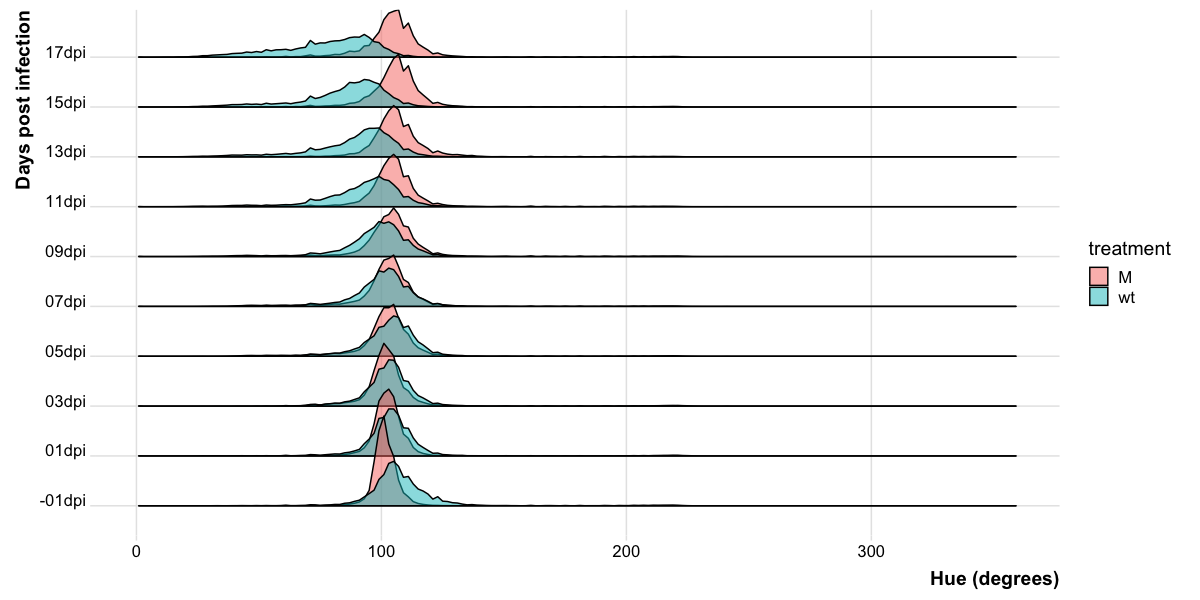

In [13]:
# create a ggridges plot - color by treatment
ggplot(data.ave, aes(x = label, y = timestamp, height = density.mean)) + 
    # create the density curves, color by treatment group
    geom_density_ridges2(stat = "identity", aes(fill=treatment), alpha=0.5) +
    scale_x_continuous("Hue (degrees)") +
    scale_y_discrete("Days post infection") +
    theme_bw() +
    theme_ridges() + 
    theme(axis.title = element_text(face="bold"))

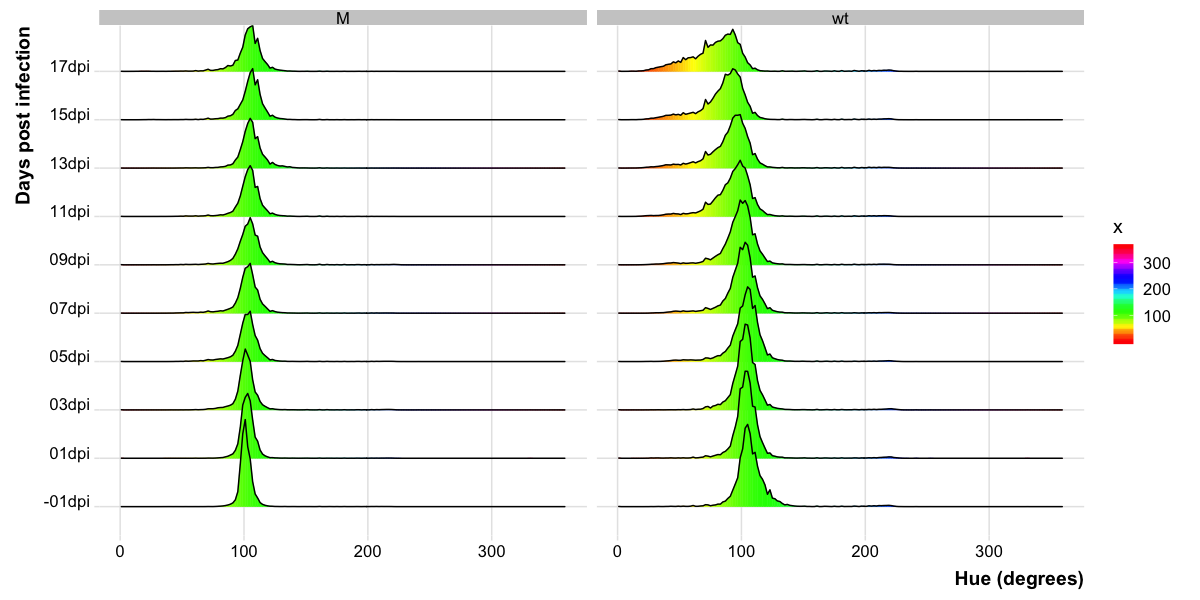

In [14]:
# create a ggridges plot - color by hue
ggplot(data.ave, aes(x = label, y = timestamp, height = density.mean)) +
    geom_density_ridges_gradient(stat = "identity", aes(fill=..x..)) +
    facet_wrap(~treatment) +
    scale_fill_gradientn(colours = rainbow(360)) +
    scale_x_continuous("Hue (degrees)") +
    scale_y_discrete("Days post infection") +
    theme_bw() +
    theme_ridges() + 
    theme(axis.title = element_text(face="bold"))